## G-CARE Benchmark

In [66]:
using Graphs: DiGraph
using StatsPlots
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")

get_cardinality_bounds (generic function with 1 method)

In [22]:
aids_data_file_path = "dataset/aids/aids.txt"
human_data_file_path = "dataset/human/human.txt"
lubm80_data_file_path = "dataset/lubm80/lubm80.txt"
yago_data_file_path = "dataset/yago/yago.txt"
yeast_data_file_path = "dataset/yeast/yeast.graph"
hprd_data_file_path = "dataset/hprd/hprd.graph"
wordnet_data_file_path = "dataset/wordnet/wordnet.graph"
dblp_data_file_path = "dataset/dblp/dblp.graph"

human_data = load_dataset(human_data_file_path)
aids_data = load_dataset(aids_data_file_path)
yeast_data = load_dataset(yeast_data_file_path, subgraph_matching_data=true)
hprd_data = load_dataset(hprd_data_file_path, subgraph_matching_data=true)
wordnet_data = load_dataset(wordnet_data_file_path, subgraph_matching_data=true)
dblp_data = load_dataset(dblp_data_file_path, subgraph_matching_data=true)
#lubm80_data = load_dataset(lubm80_data_file_path)
#yago_data = load_dataset(yago_data_file_path)
nothing

In [23]:
#datasets = [aids_data, human_data, lubm80_data, yago_data]
#dataset_names = ["aids", "human", "lubm80", "yago"]
datasets = Dict("aids"=>aids_data, "human"=>human_data, "yeast"=>yeast_data, "hprd" => hprd_data, "wordnet" => wordnet_data)
#dataset_names = ["aids", "human", "yeast"]
dataset_names = ["wordnet"]
num_sample_nodes = Dict("aids"=>10000, "human"=>100, "yeast"=>50, "hprd"=>100, "wordnet"=>100)
gcare_dataset = Dict("aids"=>true, "human"=>true, "yeast"=>false, "hprd"=>false, "wordnet"=>false)
max_cycle_size = Dict("aids"=>6, "human"=>-1, "yeast"=>6, "hprd"=>-1, "wordnet"=>3)

Dict{String, Int64} with 5 entries:
  "yeast"   => 6
  "wordnet" => 3
  "hprd"    => -1
  "aids"    => 6
  "human"   => -1

In [24]:
build_time = Dict()
summary_size = Dict()
color_summaries = Dict()
hash_color_summaries = Dict()
no_color_summaries = Dict()
degree_color_summaries = Dict()
directed_degree_color_summaries = Dict()
num_colors = 64
for dataset in dataset_names
    directed_degree_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset], partitioner="DirectedDegree")
    degree_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset], partitioner="Degree")
    results = @timed generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset])
    build_time[dataset] = results[2]
    summary_size[dataset] = get_color_summary_size(results[1])
    color_summaries[dataset] = results[1]
    hash_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset], partitioner="Hash")
    no_color_summaries[dataset] = generate_color_summary(datasets[dataset], 1, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset])
end

Generating Cycles of Size: 2
Generating Cycles of Size: 

3


Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Generating Cycles of Size: 2
Generating Cycles of Size: 3


Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Generating Cycles of Size: 2
Generating Cycles of Size: 3
Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Generating Cycles of Size: 2
Generating Cycles of Size: 3


Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Generating Cycles of Size: 2
Generating Cycles of Size: 3
Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics


In [25]:
query_directories = Dict()
query_directories["human"] = ["/queryset/human/Chain_3/",
                                "/queryset/human/Graph_3/",
                                "/queryset/human/Star_3/",
                                "/queryset/human/Tree_3/"]
query_directories["aids"] = ["/queryset/aids/Chain_3/",
                                "/queryset/aids/Chain_6/",
                                "/queryset/aids/Chain_9/",
                                "/queryset/aids/Chain_12/",
                                "/queryset/aids/Cycle_3/",
                                "/queryset/aids/Cycle_6/",
                                "/queryset/aids/Flower_6/",
                                "/queryset/aids/Flower_9/",
                                "/queryset/aids/Flower_12/",
                                "/queryset/aids/Graph_3/",
                                "/queryset/aids/Graph_6/",
                                "/queryset/aids/Graph_9/",
                                "/queryset/aids/Graph_12/",
                                "/queryset/aids/Petal_6/",
                                "/queryset/aids/Petal_9/",
                                "/queryset/aids/Petal_12/",
                                "/queryset/aids/Star_3/",
                                "/queryset/aids/Star_6/",
                                "/queryset/aids/Star_9/",
                                "/queryset/aids/Tree_3/",
                                "/queryset/aids/Tree_6/",
                                "/queryset/aids/Tree_9/",
                                "/queryset/aids/Tree_12/"]

query_directories["yeast"] = ["/queryset/yeast"]
query_directories["hprd"] = ["/queryset/hprd"]
query_directories["wordnet"] = ["/queryset/wordnet"]
dataset_names = ["wordnet"]
                                

query_paths = Dict()
for dataset in dataset_names
    query_paths[dataset] = [readdir(pwd() * dir, join=true) for dir in query_directories[dataset]]
    query_paths[dataset] = [(query_paths[dataset]...)...]
end
exact_sizes = Dict(dataset => [] for dataset in dataset_names)
bounds = Dict(dataset => [] for dataset in dataset_names)
bounds_with_stats = Dict(dataset => [] for dataset in dataset_names)
bounds_with_hash = Dict(dataset => [] for dataset in dataset_names)
bounds_with_no_color = Dict(dataset => [] for dataset in dataset_names)
bounds_with_degree = Dict(dataset => [] for dataset in dataset_names)
bounds_with_directed_degree = Dict(dataset => [] for dataset in dataset_names)
query_types = Dict(dataset => [] for dataset in dataset_names)
count = 0
for dataset in dataset_names
    println("---------------------------------------------------------------------------------------------")
    println("Running ", dataset)
    for query_path in query_paths[dataset]
        occursin("dense_32", query_path) && continue
        occursin("dense_24", query_path) && continue
        occursin("dense_20", query_path) && continue
        occursin("dense_16", query_path) && continue
        occursin("dense_12", query_path) && continue
        occursin("dense_8", query_path) && continue
        occursin("sparse_32", query_path) && continue
        occursin("sparse_24", query_path) && continue
        count += 1
        count % 10 != 0 && continue
        println("Query: ", query_path)
        if gcare_dataset[dataset]
            query_type = match(r".*/queryset/.*/(.*)_.*/.*", query_path).captures[1]
            exact_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
            id_and_query = load_query(query_path)
            id = id_and_query[1]
            query = id_and_query[2]
        else
            query_type = match(r".*/queryset/.*/query_(.*)_.*", query_path).captures[1]
            if isfile(replace(query_path, "queryset"=>"TrueCardinalities"))
                exact_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
            else
                continue
            end
            id_and_query = load_query(query_path, subgraph_matching_data=true)
            id = id_and_query[1]
            query = id_and_query[2]
        end
        bound_results = @timed get_cardinality_bounds(query, color_summaries[dataset], usingStoredStats=false)
        bound_results_with_stats = get_cardinality_bounds(query, color_summaries[dataset], usingStoredStats=true)
        bound_results_with_hash = get_cardinality_bounds(query, hash_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_no_color = get_cardinality_bounds(query, no_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_degree = get_cardinality_bounds(query, degree_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_directed_degree = get_cardinality_bounds(query, directed_degree_color_summaries[dataset], usingStoredStats=true)
        bound_results[1][2] = max(1, bound_results[1][2])
        bound_results_with_stats[2] = max(1, bound_results_with_stats[2])
        bound_results_with_hash[2] = max(1, bound_results_with_hash[2])
        bound_results_with_no_color[2] = max(1, bound_results_with_no_color[2])
        bound_results_with_degree[2] = max(1, bound_results_with_degree[2])
        bound_results_with_directed_degree[2] = max(1, bound_results_with_directed_degree[2])
        push!(exact_sizes[dataset], exact_size)
        push!(bounds[dataset], bound_results[1])
        push!(bounds_with_stats[dataset], bound_results_with_stats)
        push!(bounds_with_hash[dataset], bound_results_with_hash)
        push!(bounds_with_no_color[dataset], bound_results_with_no_color)
        push!(bounds_with_degree[dataset], bound_results_with_degree)
        push!(bounds_with_directed_degree[dataset], bound_results_with_directed_degree)
        push!(query_types[dataset], query_type)
    end
end
relative_errors = Dict(dataset => bounds[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_stats = Dict(dataset => bounds_with_stats[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_hash = Dict(dataset => bounds_with_hash[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_no_color = Dict(dataset => bounds_with_no_color[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_degree = Dict(dataset => bounds_with_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_directed_degree = Dict(dataset => bounds_with_directed_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)

---------------------------------------------------------------------------------------------
Running wordnet
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_107.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_116.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_125.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_134.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_143.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_152.graph
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_161.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_170.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_18.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_189.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_198.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_26.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_35.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_44.graph
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_53.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_62.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_71.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_80.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_9.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_dense_4_99.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_sparse_12_107.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_sparse_12_116.graph
Query: /home/kylebd99/Cardinality-with-Colors/queryset/wordnet/query_sparse_12_125.graph


InterruptException: InterruptException:

In [18]:

relative_errors = Dict(dataset => bounds[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_stats = Dict(dataset => bounds_with_stats[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_hash = Dict(dataset => bounds_with_hash[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_no_color = Dict(dataset => bounds_with_no_color[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_degree = Dict(dataset => bounds_with_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_directed_degree = Dict(dataset => bounds_with_directed_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)

Dict{String, Vector{Vector{Float64}}} with 1 entry:
  "wordnet" => [[0.0, 0.0167066, 635.503], [0.0, 0.072889, 641.376], [0.0, 0.01…

In [ ]:
sum([x[2] != 1 for x in values(bounds)])

In [ ]:
sum([x[2] != 1 for x in values(bounds)])

In [ ]:
exact_sizes["yeast"][exact_sizes["yeast"] .> 0]

In [ ]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["human"]]... [x[2] for x in relative_errors_with_hash["human"]]...  [x[2] for x in relative_errors_with_no_color["human"]]...  [x[2] for x in relative_errors_with_degree["human"]]... [x[2] for x in relative_errors_with_directed_degree["human"]]... ])
grouped_query_types = vec([query_types["human"]... query_types["human"]... query_types["human"]... query_types["human"]... query_types["human"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["human"])]... ["Hash" for _ in 1:length(query_types["human"])]... ["No Partition" for _ in 1:length(query_types["human"])]... ["Degree" for _ in 1:length(query_types["human"])]... ["Directed Degree" for _ in 1:length(query_types["human"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10, ylims=[10^-4, 10^7], yticks=[10^-4, 10^-2, 1, 10^2, 10^4, 10^6])

In [ ]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["aids"]]... [x[2] for x in relative_errors_with_hash["aids"]]...  [x[2] for x in relative_errors_with_no_color["aids"]]...  [x[2] for x in relative_errors_with_degree["aids"]]... [x[2] for x in relative_errors_with_directed_degree["aids"]]... ])
grouped_query_types = vec([query_types["aids"]... query_types["aids"]... query_types["aids"]... query_types["aids"]... query_types["aids"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["aids"])]... ["Hash" for _ in 1:length(query_types["aids"])]... ["No Partition" for _ in 1:length(query_types["aids"])]... ["Degree" for _ in 1:length(query_types["aids"])]... ["Directed Degree" for _ in 1:length(query_types["aids"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

In [ ]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["yeast"]]... [x[2] for x in relative_errors_with_hash["yeast"]]...  [x[2] for x in relative_errors_with_no_color["yeast"]]...  [x[2] for x in relative_errors_with_degree["yeast"]]... [x[2] for x in relative_errors_with_directed_degree["yeast"]]... ])
grouped_query_types = vec([query_types["yeast"]... query_types["yeast"]... query_types["yeast"]... query_types["yeast"]... query_types["yeast"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["yeast"])]... ["Hash" for _ in 1:length(query_types["yeast"])]... ["No Partition" for _ in 1:length(query_types["yeast"])]... ["Degree" for _ in 1:length(query_types["yeast"])]... ["Directed Degree" for _ in 1:length(query_types["yeast"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

In [ ]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["hprd"]]... [x[2] for x in relative_errors_with_hash["hprd"]]...  [x[2] for x in relative_errors_with_no_color["hprd"]]...  [x[2] for x in relative_errors_with_degree["hprd"]]... [x[2] for x in relative_errors_with_directed_degree["hprd"]]... ])
grouped_query_types = vec([query_types["hprd"]... query_types["hprd"]... query_types["hprd"]... query_types["hprd"]... query_types["hprd"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["hprd"])]... ["Hash" for _ in 1:length(query_types["hprd"])]... ["No Partition" for _ in 1:length(query_types["hprd"])]... ["Degree" for _ in 1:length(query_types["hprd"])]... ["Directed Degree" for _ in 1:length(query_types["hprd"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

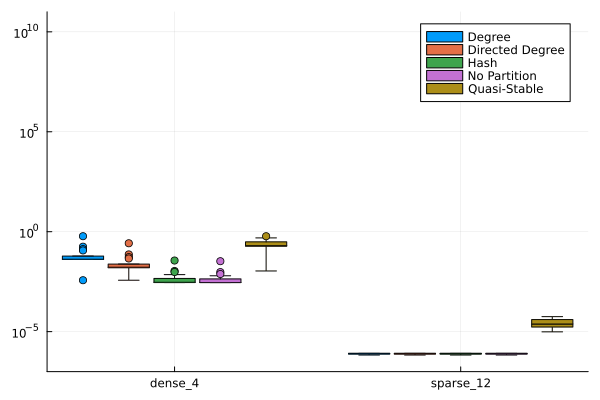

In [21]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["wordnet"]]... [x[2] for x in relative_errors_with_hash["wordnet"]]...  [x[2] for x in relative_errors_with_no_color["wordnet"]]...  [x[2] for x in relative_errors_with_degree["wordnet"]]... [x[2] for x in relative_errors_with_directed_degree["wordnet"]]... ])
grouped_query_types = vec([query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]... query_types["wordnet"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["wordnet"])]... ["Hash" for _ in 1:length(query_types["wordnet"])]... ["No Partition" for _ in 1:length(query_types["wordnet"])]... ["Degree" for _ in 1:length(query_types["wordnet"])]... ["Directed Degree" for _ in 1:length(query_types["wordnet"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10,  ylims=[10^-7, 10^11], yticks=[10^-5, 1, 10^5, 10^10])

In [68]:
query_directories = Dict()
query_directories["yeast"] = ["/queryset/yeast"]
query_directories["hprd"] = ["/queryset/hprd"]
query_directories["wordnet"] = ["/queryset/wordnet"]
dataset_names = ["yeast"]

query_paths = Dict()
for dataset in dataset_names
    query_paths[dataset] = [readdir(pwd() * dir, join=true) for dir in query_directories[dataset]]
    query_paths[dataset] = [(query_paths[dataset]...)...]
end
count = 0
timeout = 120
query = 0
for dataset in dataset_names
    println("---------------------------------------------------------------------------------------------")
    println("Running ", dataset)
    for query_path in query_paths[dataset]
        count += 1
        true_card_path = replace(query_path, "queryset"=>"TrueCardinalities")
        id_and_query = load_query(query_path, subgraph_matching_data=true)
        if isfile(true_card_path)  || !occursin("sparse_8_", query_path) 
            continue
        end
        println("Query: ", query_path)
        id = id_and_query[1]
        query = id_and_query[2]
        exact_size = get_exact_size(query, datasets[dataset], timeout=timeout)
        if exact_size < 0
            println("Timed Out!")
            continue
        elseif exact_size == 0
            println("Zero Matches!")
            continue
        end
        true_card_file = open(true_card_path, "w")
        show(true_card_file , exact_size)
        close(true_card_file)
    end
end

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in human_relative_errors]))
println(mean([abs(log10(x[2])) for x in human_relative_errors]))
println(minimum([log10(x[2]) for x in human_relative_errors]))

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in human_relative_errors_with_stats]))
println(mean([abs(log10(x[2])) for x in human_relative_errors_with_stats]))
println(minimum([log10(x[2]) for x in human_relative_errors_with_stats]))

In [ ]:
StatsPlots.boxplot(human_query_type, [x[2] for x in human_relative_errors_with_stats],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Coloring", ylims=[10^-4, 10^7], yticks=[10^-4,10^-2, 1, 10^2, 10^4, 10^6])
StatsPlots.boxplot!(human_query_type, [x[2] for x in human_relative_errors_with_hash],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Hash")
StatsPlots.boxplot!(human_query_type, [x[2] for x in human_relative_errors_with_no_color],  yscale=:log10, fillalpha=0.5, linewidth=2, label="1 Color")

In [ ]:
include("Source/QuasiStableCardinalityEstimator.jl")

aids_query_directories = ["/queryset/aids/Chain_3/",
"/queryset/aids/Chain_6/",
"/queryset/aids/Chain_9/",
"/queryset/aids/Chain_12/",
"/queryset/aids/Cycle_3/",
"/queryset/aids/Cycle_6/",
"/queryset/aids/Flower_6/",
"/queryset/aids/Flower_9/",
"/queryset/aids/Flower_12/",
"/queryset/aids/Graph_3/",
"/queryset/aids/Graph_6/",
"/queryset/aids/Graph_9/",
"/queryset/aids/Graph_12/",
"/queryset/aids/Petal_6/",
"/queryset/aids/Petal_9/",
"/queryset/aids/Petal_12/",
"/queryset/aids/Star_3/",
"/queryset/aids/Star_6/",
"/queryset/aids/Star_9/",
"/queryset/aids/Tree_3/",
"/queryset/aids/Tree_6/",
"/queryset/aids/Tree_9/",
"/queryset/aids/Tree_12/"]
aids_query_paths = [readdir(pwd() * dir, join=true) for dir in aids_query_directories]
aids_query_paths = [(aids_query_paths...)...]
aids_exact_sizes = []
aids_bounds = []
aids_bounds_with_stats = []
aids_relative_errors = []
aids_relative_errors_with_stats = []
aids_query_types = []
println("Summary Size: ", summary_size["aids"])
println("Summary Build Time: ", build_time["aids"])
for query_path in aids_query_paths
    println("Query: ", query_path)
    id_and_query = load_query(query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    query_type = match(r".*/queryset/aids/(.*)_.*/.*", query_path).captures[1]
    if query_type != "Cycle"
        continue
    end
    bound_results = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=false)
    bound_results_with_stats = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=true)
    gcare_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
#    println("Bound Time: ", bound_results[2])
#    println("Exact Size: ", gcare_size)
#    println("Bound [Lower, Avg, Upper]: ", bound_results[1])
#    println("Relative Error [Lower, Avg, Upper]: ", bound_results[1]./gcare_size)
    bound_results[1][2] = max(1, bound_results[1][2])
    bound_results_with_stats[1][2] = max(1, bound_results_with_stats[1][2])
    push!(aids_exact_sizes, gcare_size)
    push!(aids_bounds, bound_results[1])
    push!(aids_bounds_with_stats, bound_results_with_stats[1])
    push!(aids_relative_errors, bound_results[1] ./ gcare_size)
    push!(aids_relative_errors_with_stats, bound_results_with_stats[1] ./ gcare_size)
    push!(aids_query_types, query_type)
end

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in aids_relative_errors]))
println(mean([log10(x[2]) for x in aids_relative_errors]))
println(mean([abs(log10(x[2])) for x in aids_relative_errors]))
println(minimum([log10(x[2]) for x in aids_relative_errors]))

In [ ]:
using Statistics
println(maximum([log10(x[2]) for x in aids_relative_errors_with_stats]))
println(mean([log10(x[2]) for x in aids_relative_errors_with_stats]))
println(mean([abs(log10(x[2])) for x in aids_relative_errors_with_stats]))
println(minimum([log10(x[2]) for x in aids_relative_errors_with_stats]))

In [ ]:
StatsPlots.boxplot(aids_query_types, [x[2] for x in aids_relative_errors_with_stats],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Cycle Stats", ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])
StatsPlots.boxplot!(aids_query_types, [x[2] for x in aids_relative_errors],  yscale=:log10, fillalpha=0.5, linewidth=2, label="Without Cycle Stats")

In [ ]:
print(data[!,"QueryType"])

In [ ]:
lubm80_query_paths = ["lubm80/lubm80_Q2.txt",
# "lubm80/lubm80_Q4.txt",
# "lubm80/lubm80_Q7.txt",
# "lubm80/lubm80_Q8.txt",
# "lubm80/lubm80_Q9.txt",
# "lubm80/lubm80_Q12.txt"
                    ]
exactSizes = []
bounds = []
relativeErrors = []
println("Summary Size: ", summary_size[1])
println("Summary Build Time: ", build_time[1])
for query_path in lubm80_query_paths
    println("Query: ", query_path)
    id_and_query = load_query("queryset/" * query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    bound_results = @timed get_cardinality_bounds(query, color_summaries[1])
    exact_size_results = @timed get_exact_size(query, datasets[1])
    gcare_size = load_true_cardinality("TrueCardinalities/" * query_path)
    println("Bound Time: ", bound_results[2])
    println("Exact Size Time: ", exact_size_results[2])
    println("Exact Size: ", exact_size_results[1])
    println("GCare Exact Size: ", gcare_size)
    if gcare_size != exact_size_results[1]
        println("Bad Exact Size Estimate!!")
        break
    end
    println("Bound [Lower, Avg, Upper]: ", bound_results[1])
    println("Relative Error [Lower, Avg, Upper]: ", (bound_results[1])./exact_size_results[1])
    push!(exactSizes, gcare_size)
    push!(bounds, bound_results[1])
    push!(relativeErrors, bound_results[1] ./ gcare_size)
end

In [ ]:
exactSizes